In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd

from time import process_time
from HSDM_fpt import ie_bessel_fpt
from HSDM_fpt import series_bessel_fpt

import matplotlib.pyplot as plt

In [2]:
def cal_time_series(dim, rep=20):
    series_comp_time = {'25':[],
                        '50':[],
                        '75':[],
                        '100':[]}
    
    for N in [25, 50, 75, 100]:
        for _ in range(rep):
            time_start = process_time()
            series_bessel_fpt(np.arange(0.001, 5, 0.1), a=2, sigma=1, nu=(dim-2)/2, n=N)
            time_elapsed = (process_time() - time_start)
            series_comp_time[str(N)].append(time_elapsed)

    return pd.DataFrame(series_comp_time)
    

In [3]:
def cal_time_ie(dim, rep=20):
    ie_comp_time = {'0.2':[],
                    '0.15':[],
                    '0.1':[],
                    '0.05':[]}
    
    for dt in [0.2, 0.15, 0.1, 0.05]:
        for _ in range(rep):
            time_start = process_time()
            ie_bessel_fpt(lambda t: 4, lambda t:0, dim, 0.0001, sigma=2, dt=dt, T_max=5)
            time_elapsed = (process_time() - time_start)
            ie_comp_time[str(dt)].append(time_elapsed)

    return pd.DataFrame(ie_comp_time)

# Computational time

In [4]:
series_comp_time_2D = cal_time_series(2, rep=100)

series_comp_time_3D = cal_time_series(3, rep=100)

series_comp_time_4D = cal_time_series(4, rep=100)

In [5]:
pd.concat([series_comp_time_2D.mean(), 
           series_comp_time_3D.mean(), 
           series_comp_time_4D.mean()], axis=1)*1000

,0,1,2
25,9.79579,34.95610,9.84451
50,25.03262,73.91020,26.12100
75,48.90780,112.66295,49.47095
100,82.08097,151.79867,83.80560


In [6]:
pd.concat([series_comp_time_2D.std(), 
           series_comp_time_3D.std(), 
           series_comp_time_4D.std()], axis=1)*1000

,0,1,2
25,0.169991,0.492947,0.028650
50,0.077664,1.892624,0.807732
75,1.264574,2.376080,0.411736
100,1.668652,3.513689,1.648791


In [7]:
ie_comp_time_2D = cal_time_ie(2, rep=100)

ie_comp_time_3D = cal_time_ie(3, rep=100)

ie_comp_time_4D = cal_time_ie(4, rep=100)

In [8]:
pd.concat([ie_comp_time_2D.mean(), 
           ie_comp_time_3D.mean(), 
           ie_comp_time_4D.mean()], axis=1)*1000

,0,1,2
0.2,2.08126,1.92511,2.02819
0.15,3.48811,3.25912,3.44218
0.1,7.63384,7.27677,7.59381
0.05,30.33396,28.53453,29.44541


In [9]:
pd.concat([ie_comp_time_2D.std(), 
           ie_comp_time_3D.std(), 
           ie_comp_time_4D.std()], axis=1)*1000

,0,1,2
0.2,0.069789,0.006651,0.012368
0.15,0.022252,0.012116,0.020907
0.1,0.090516,0.111565,0.047185
0.05,0.767982,0.574538,0.181195


# plot

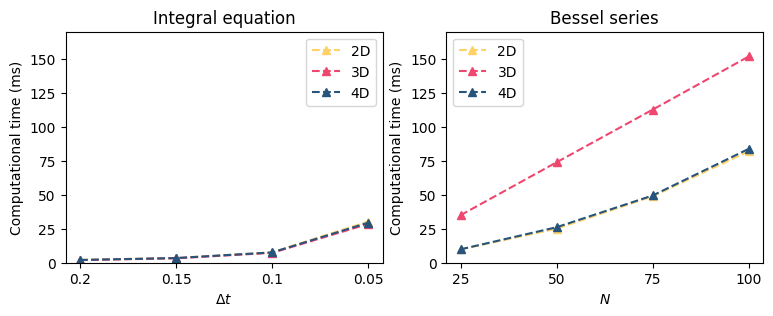

In [10]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.ylim(0, 170)
plt.plot(ie_comp_time_2D.mean().index,
         ie_comp_time_2D.mean().values*1000, '--^', c='#ffd166', label='2D')
plt.plot(ie_comp_time_3D.mean().index,
         ie_comp_time_3D.mean().values*1000, '--^', c='#ef476f', label='3D')
plt.plot(ie_comp_time_4D.mean().index,
         ie_comp_time_4D.mean().values*1000, '--^', c='#26547c', label='4D')
plt.title('Integral equation')
plt.xlabel(r'$\Delta t$')
plt.ylabel('Computational time (ms)');
plt.legend();

plt.subplot(122)
plt.ylim(0, 170)
plt.plot(series_comp_time_2D.mean().index,
         series_comp_time_2D.mean().values*1000, '--^', c='#ffd166', label='2D')
plt.plot(series_comp_time_3D.mean().index,
         series_comp_time_3D.mean().values*1000, '--^', c='#ef476f', label='3D')
plt.plot(series_comp_time_4D.mean().index,
         series_comp_time_4D.mean().values*1000, '--^', c='#26547c', label='4D');
plt.title('Bessel series')
plt.xlabel(r'$N$');
plt.ylabel('Computational time (ms)');

plt.legend();
plt.savefig('../_01_Figures/comp_time.pdf', 
            transparent=True, 
            dpi=600, 
            bbox_inches='tight');